In [1]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [3]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [4]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [6]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [7]:
for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        
        total_cost += cost_val
        
    print('Epoch: ', '%04d' % (epoch + 1), 'Avg. Cost = ', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch:  0001 Avg. Cost =  0.426
Epoch:  0002 Avg. Cost =  0.165
Epoch:  0003 Avg. Cost =  0.114
Epoch:  0004 Avg. Cost =  0.090
Epoch:  0005 Avg. Cost =  0.075
Epoch:  0006 Avg. Cost =  0.061
Epoch:  0007 Avg. Cost =  0.054
Epoch:  0008 Avg. Cost =  0.046
Epoch:  0009 Avg. Cost =  0.041
Epoch:  0010 Avg. Cost =  0.037
Epoch:  0011 Avg. Cost =  0.035
Epoch:  0012 Avg. Cost =  0.031
Epoch:  0013 Avg. Cost =  0.027
Epoch:  0014 Avg. Cost =  0.027
Epoch:  0015 Avg. Cost =  0.026
Epoch:  0016 Avg. Cost =  0.026
Epoch:  0017 Avg. Cost =  0.024
Epoch:  0018 Avg. Cost =  0.023
Epoch:  0019 Avg. Cost =  0.021
Epoch:  0020 Avg. Cost =  0.021
Epoch:  0021 Avg. Cost =  0.020
Epoch:  0022 Avg. Cost =  0.020
Epoch:  0023 Avg. Cost =  0.019
Epoch:  0024 Avg. Cost =  0.017
Epoch:  0025 Avg. Cost =  0.019
Epoch:  0026 Avg. Cost =  0.017
Epoch:  0027 Avg. Cost =  0.015
Epoch:  0028 Avg. Cost =  0.017
Epoch:  0029 Avg. Cost =  0.016
Epoch:  0030 Avg. Cost =  0.016
최적화 완료!


In [8]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [9]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

정확도:  0.9804


<IPython.core.display.Javascript object>


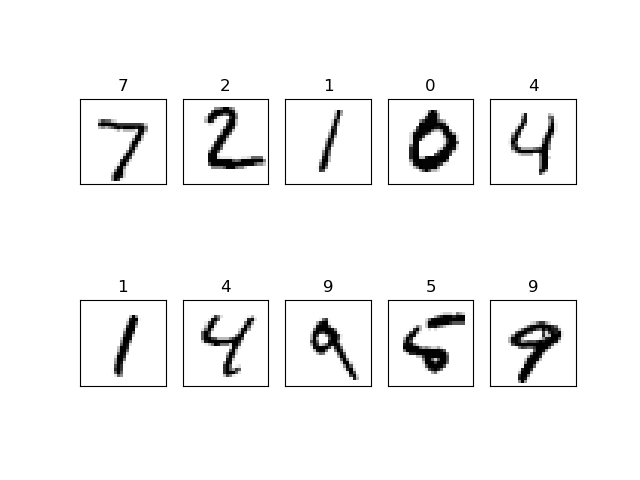

In [11]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()

In [12]:
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('%d' % np.argmax(labels[i]))
    
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)

In [13]:
plt.show()